In [1]:
%matplotlib inline

# Load housing dataset
CRIM:犯罪発生率（人口単位）
ZN: 25,000平方フィート以上の住宅区画の割合
INDUS: 非小売業の土地面積の割合（人口単位）
CHAS: チャールズ川沿いかどうか（チャールズ川沿いの場合は１、そうでない場合は０）
NOX: 窒素酸化物の濃度（pphm単位）
RM: １戸あたりの平均部屋数
AGE: 1940年よりも前に建てられた家屋の割合
DIS: ボストンの主な５つの雇用圏までの重み付きの距離
RAD: 幹線道路へのアクセス指数
TAX: 10,000ドルあたりの所得税率
PTRATIO: 教師あたりの生徒の数（人口単位）
B: 1000(Bk - 0.63)^2として計算。Bkはアフリカ系アメリカ人居住者の割合（人口単位）
LSTAT: 低所得者の割合

In [2]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None, sep='\s+')
df.columns = ['CRIM','ZN','INDUS','CHAS', 'NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


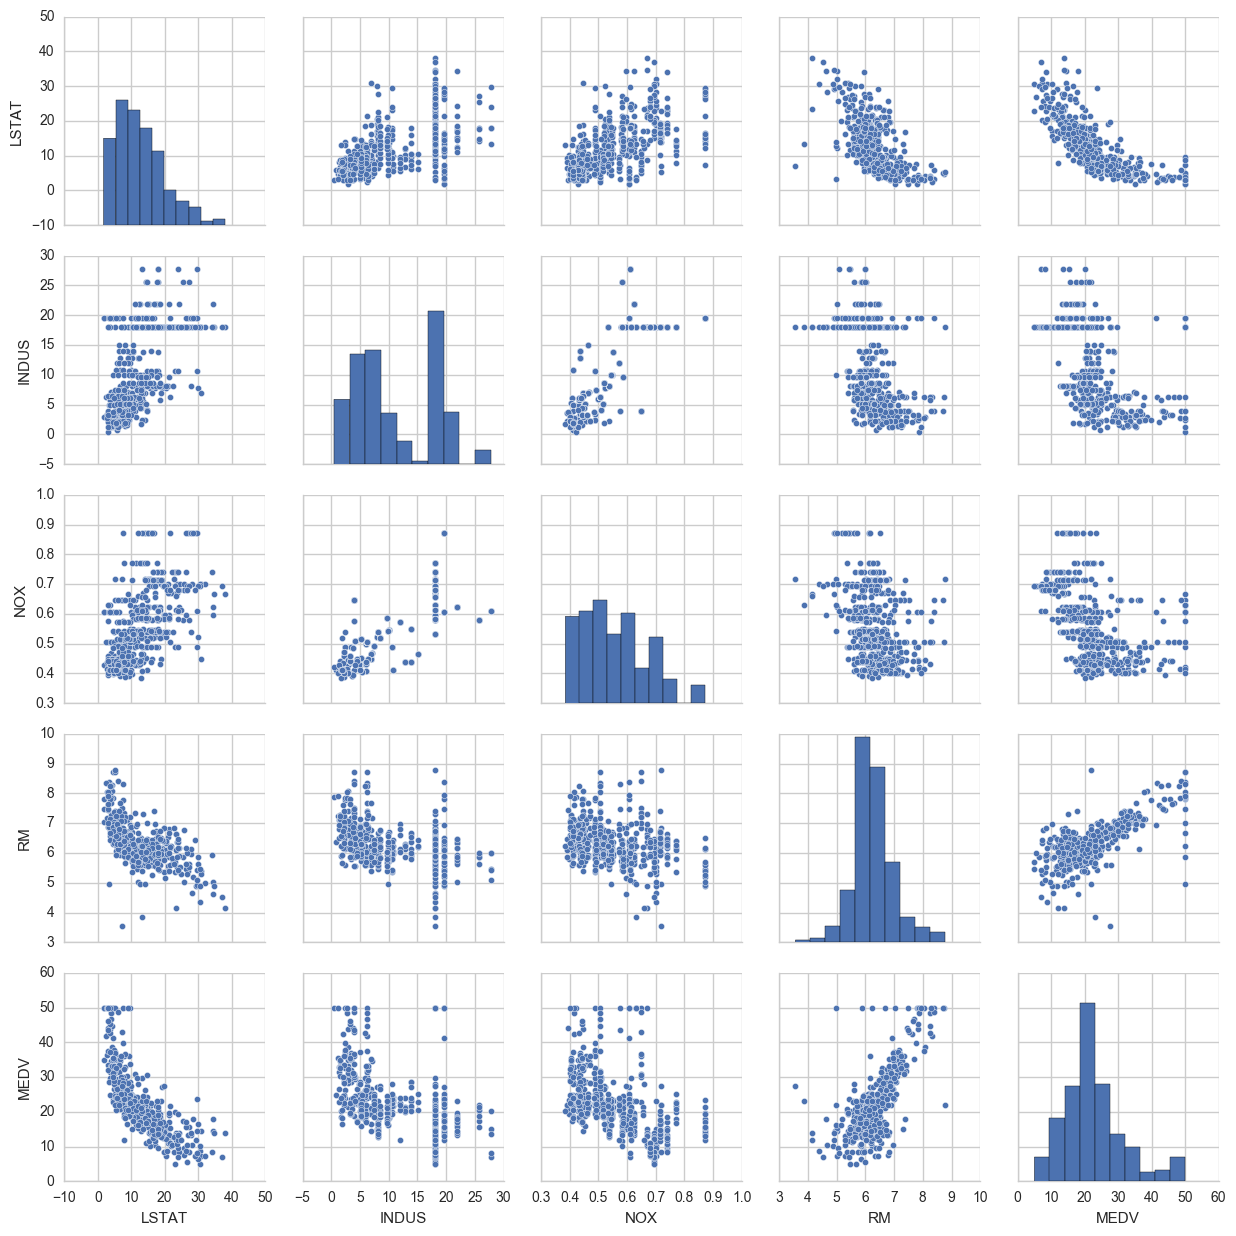

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
# グラフのスタイルをしてい（whitegridは白背景グリッド、notebookはデフォルトサイズ）
sns.set(style='whitegrid', context='notebook')
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
# 変数のペアの関係をプロット：dfはDataFrameオブジェクト、sizeは１面のインチサイズ
sns.pairplot(df[cols], size=2.5)
plt.show()

ピアソンの積率相関係数$r$(Pearson product-moment correlation coefficient)は下記の式で与えられる
$$
r = \frac
{\sum_{i=1}^n \left[ \left( x^{(i)} - \mu_x \right) \left( y^{(i)} - \mu_y \right)  \right]}
{\sqrt{\sum_{i=1}^n \left(x^{(i)} -  \mu_x \right)^2 } \sqrt{\sum_{i=1}^n \left( y^{(i)} - \mu_y \right)^2 }}
= \frac{\sigma_{xy}}{\sigma_x \sigma_y}$$

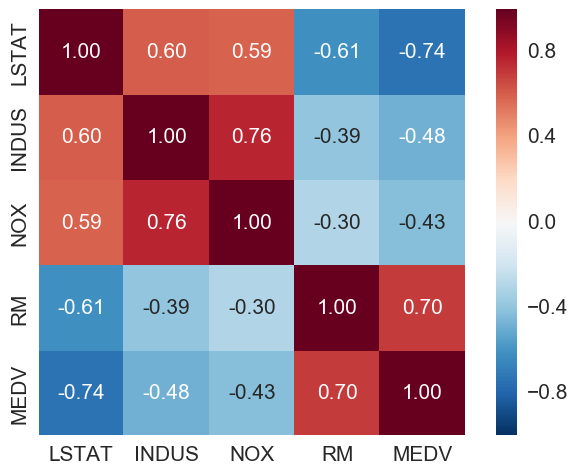

In [4]:
import numpy as np
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, 
                 cbar=True, # カラーバーの表示
                 annot=True, # データ値の表示
                 square=True, # 各矩形の正方形化(縦と横のサイズを一致させる)
                 fmt='.2f', # 数値などの表示形式
                 annot_kws={'size':15},# データ値のサイズの設定
                 yticklabels=cols, # 行の目盛のラベル名
                 xticklabels=cols) # 列の目盛のラベル名
plt.show()

In [12]:
class LinearRegressionGD(object):

    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)

In [13]:
X = df[['RM']].values
y = df['MEDV'].values

In [14]:
from sklearn.preprocessing import StandardScaler


sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

In [15]:
lr = LinearRegressionGD()
lr.fit(X_std, y_std)

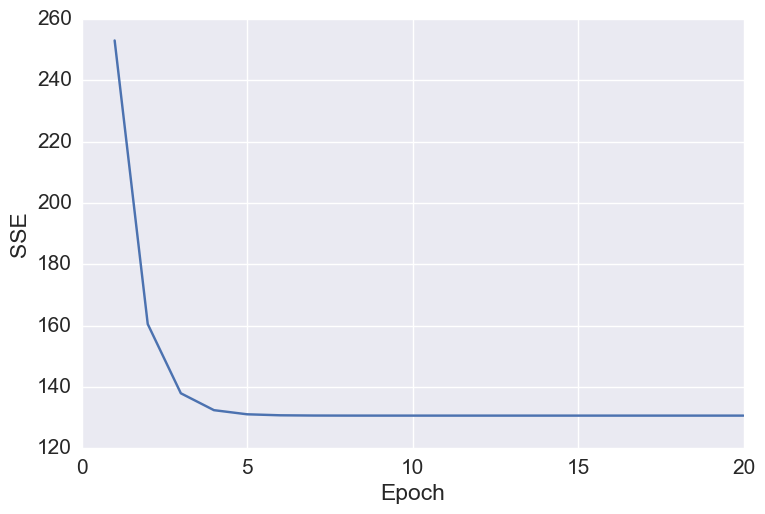

In [16]:
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.tight_layout()
# plt.savefig('./figures/cost.png', dpi=300)
plt.show()

In [17]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='lightblue')
    plt.plot(X, model.predict(X), color='red', linewidth=2)    
    return 

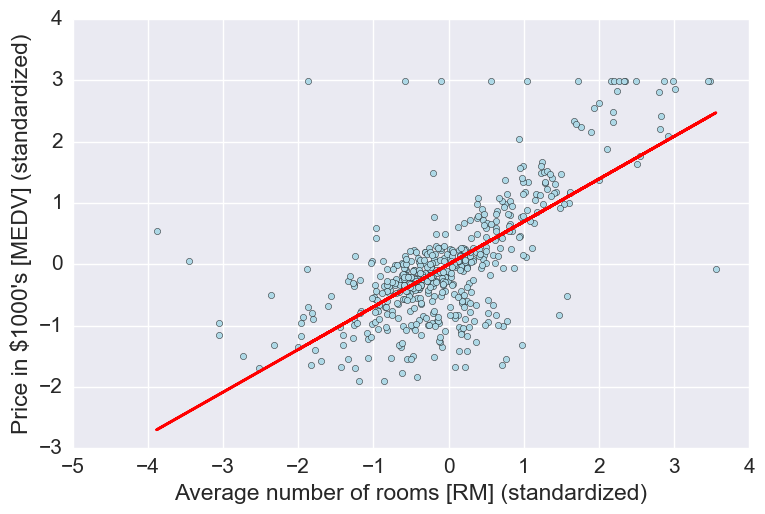

In [18]:
lin_regplot(X_std, y_std, lr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000\'s [MEDV] (standardized)')
plt.tight_layout()
# plt.savefig('./figures/gradient_fit.png', dpi=300)
plt.show()

In [19]:
num_rooms_std = sc_x.transform(np.array([[5.0]]))
price_std = lr.predict(num_rooms_std)
print("Price in $1000's: %.3f" % sc_y.inverse_transform(price_std))

Price in $1000's: 10.840


In [20]:
print('Slope: %.3f' % lr.w_[1])
print('Intercept: %.3f' % lr.w_[0])

Slope: 0.695
Intercept: -0.000


In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: 9.102
Intercept: -34.671


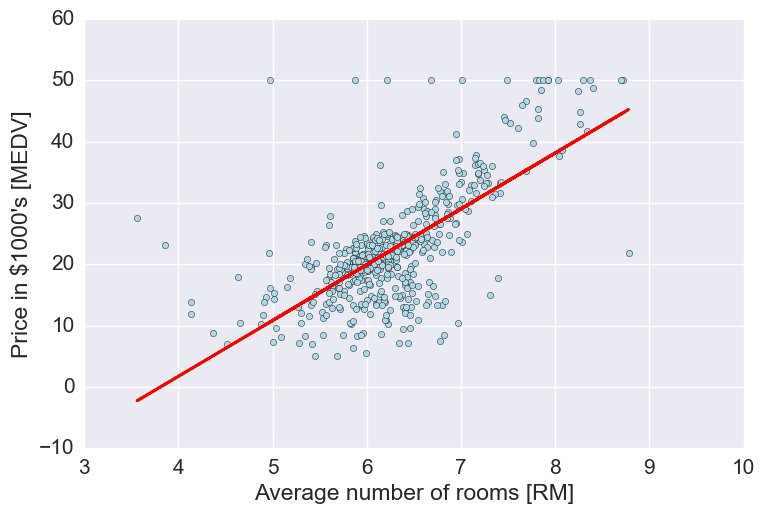

In [23]:
lin_regplot(X, y, slr)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.tight_layout()
# plt.savefig('./figures/scikit_lr_fit.png', dpi=300)
plt.show()

In [26]:
from sklearn.linear_model import RANSACRegressor
# ロバスト回帰モデルのクラスをインスタンス化
ransac = RANSACRegressor(LinearRegression(), 
                         max_trials=100, 
                         min_samples=50, 
                         residual_metric=lambda x: np.sum(np.abs(x),axis=1),
                         residual_threshold=5.0, 
                         random_state=0)
ransac.fit(X, y)

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
        is_data_valid=None, is_model_valid=None, max_trials=100,
        min_samples=50, random_state=0,
        residual_metric=<function <lambda> at 0x11ad45e18>,
        residual_threshold=5.0, stop_n_inliers=inf, stop_probability=0.99,
        stop_score=inf)

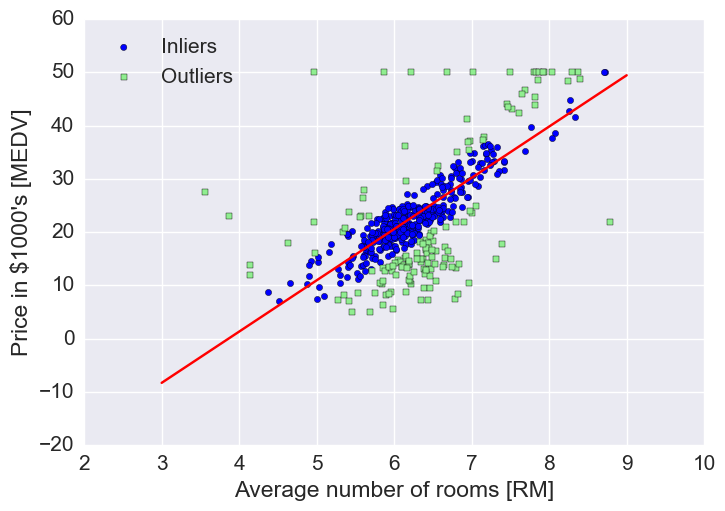

In [27]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(3,10,1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
# 正常値をプロット
plt.scatter(X[inlier_mask], y[inlier_mask], c='blue', marker='o', label='Inliers')
# 外れ値をプロット
plt.scatter(X[outlier_mask], y[outlier_mask], c='lightgreen', marker='s', label='Outliers')
# 予測値をプロット
plt.plot(line_X, line_y_ransac, color='red')
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.legend(loc='upper left')
plt.show()

In [28]:
print('Slope: %.3f' % ransac.estimator_.coef_[0])
print('Intercept: %.3f' % ransac.estimator_.intercept_)

Slope: 9.621
Intercept: -37.137


In [29]:
from sklearn.cross_validation import train_test_split
X = df.iloc[:, :-1].values
y = df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

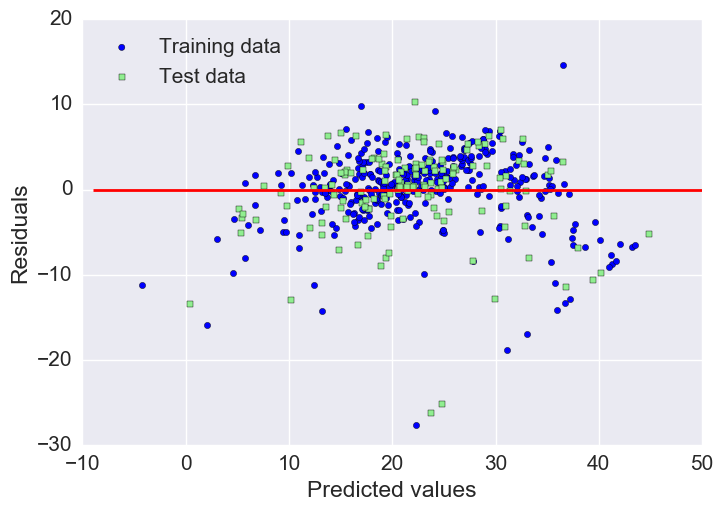

In [31]:
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='lightgreen', marker='s',label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=1-10, xmax=50, lw=2,color='red')
plt.xlim([-10,50])
plt.show()

ここで誤差の計測として残差ではなく、MSEを用いる。MSEは
$$ MSE = \frac{1}{n}\displaystyle \sum_{i=1}^n \left( y^{(i)} - \hat{y}^{(i)}    \right)^2$$
で与えられる。

In [32]:
from sklearn.metrics import mean_squared_error
# 平均二乗誤差を出力
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))

MSE train: 19.958, test: 27.196


In [33]:
# R^2(決定係数)のスコアを出力
from sklearn.metrics import r2_score
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test, y_test_pred)))

R^2 train: 0.765, test: 0.673
